In [22]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [23]:
import os
os.chdir("/Users/egorgusev/Анализ данных/data_mining_spbu/HW10")

In [24]:
df = pd.read_csv('file.csv', sep='\t')

In [25]:
df.head()

,Территория,Тип керамики,Номер образца,K,Ca,SiO2,Na,K.1,Ca.1,Mg,Ti,Fe
0,О-в Сахалин,Охотский,31,0.05,0.04,0.94,0.48,0.48,0.04,0.01,0.16,0.83
1,О-в Сахалин,Охотский,71,0.05,0.06,0.88,0.45,0.25,0.30,0.02,0.20,0.78
2,О-в Сахалин,Охотский,11,0.16,0.06,0.78,0.40,0.43,0.17,0.03,0.13,0.83
3,О-в Сахалин,Охотский,131,0.20,0.05,0.75,0.54,0.37,0.09,0.00,0.14,0.86
4,О-в Сахалин,Охотский,141,0.09,0.01,0.89,0.43,0.50,0.08,0.03,0.12,0.85


In [26]:
df = df.drop(u'Номер образца', axis=1)

In [27]:
df['Класс'] = df['Территория'] + ' ' + df['Тип керамики']

In [28]:
df['Класс'].unique()

array(['О-в Сахалин  Охотский', 'О-в Сахалин  Сусуйский',
       'Г. Вакканай Охотский', 'Г. Вакканай Сусуйский',
       'О-в Рисири Охотский', 'О-в Рисири Сусуйский',
       'О-в Ребун Охотский', 'О-в Ребун Сусуйский', 'Г. Есаши Охотский'],
      dtype=object)

In [29]:
df['Класс'] = pd.factorize(df['Класс'])[0]

In [30]:
X = df.drop(['Территория', 'Тип керамики', 'Класс'], axis=1)

In [31]:
Y = df['Класс']

In [33]:
X.head()

,K,Ca,SiO2,Na,K.1,Ca.1,Mg,Ti,Fe
0,0.05,0.04,0.94,0.48,0.48,0.04,0.01,0.16,0.83
1,0.05,0.06,0.88,0.45,0.25,0.30,0.02,0.20,0.78
2,0.16,0.06,0.78,0.40,0.43,0.17,0.03,0.13,0.83
3,0.20,0.05,0.75,0.54,0.37,0.09,0.00,0.14,0.86
4,0.09,0.01,0.89,0.43,0.50,0.08,0.03,0.12,0.85


In [34]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Класс, dtype: int64

In [98]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=4,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=2,
                               # минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               #presort=False
                              )

# Обучаем модель
model.fit(X, Y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)

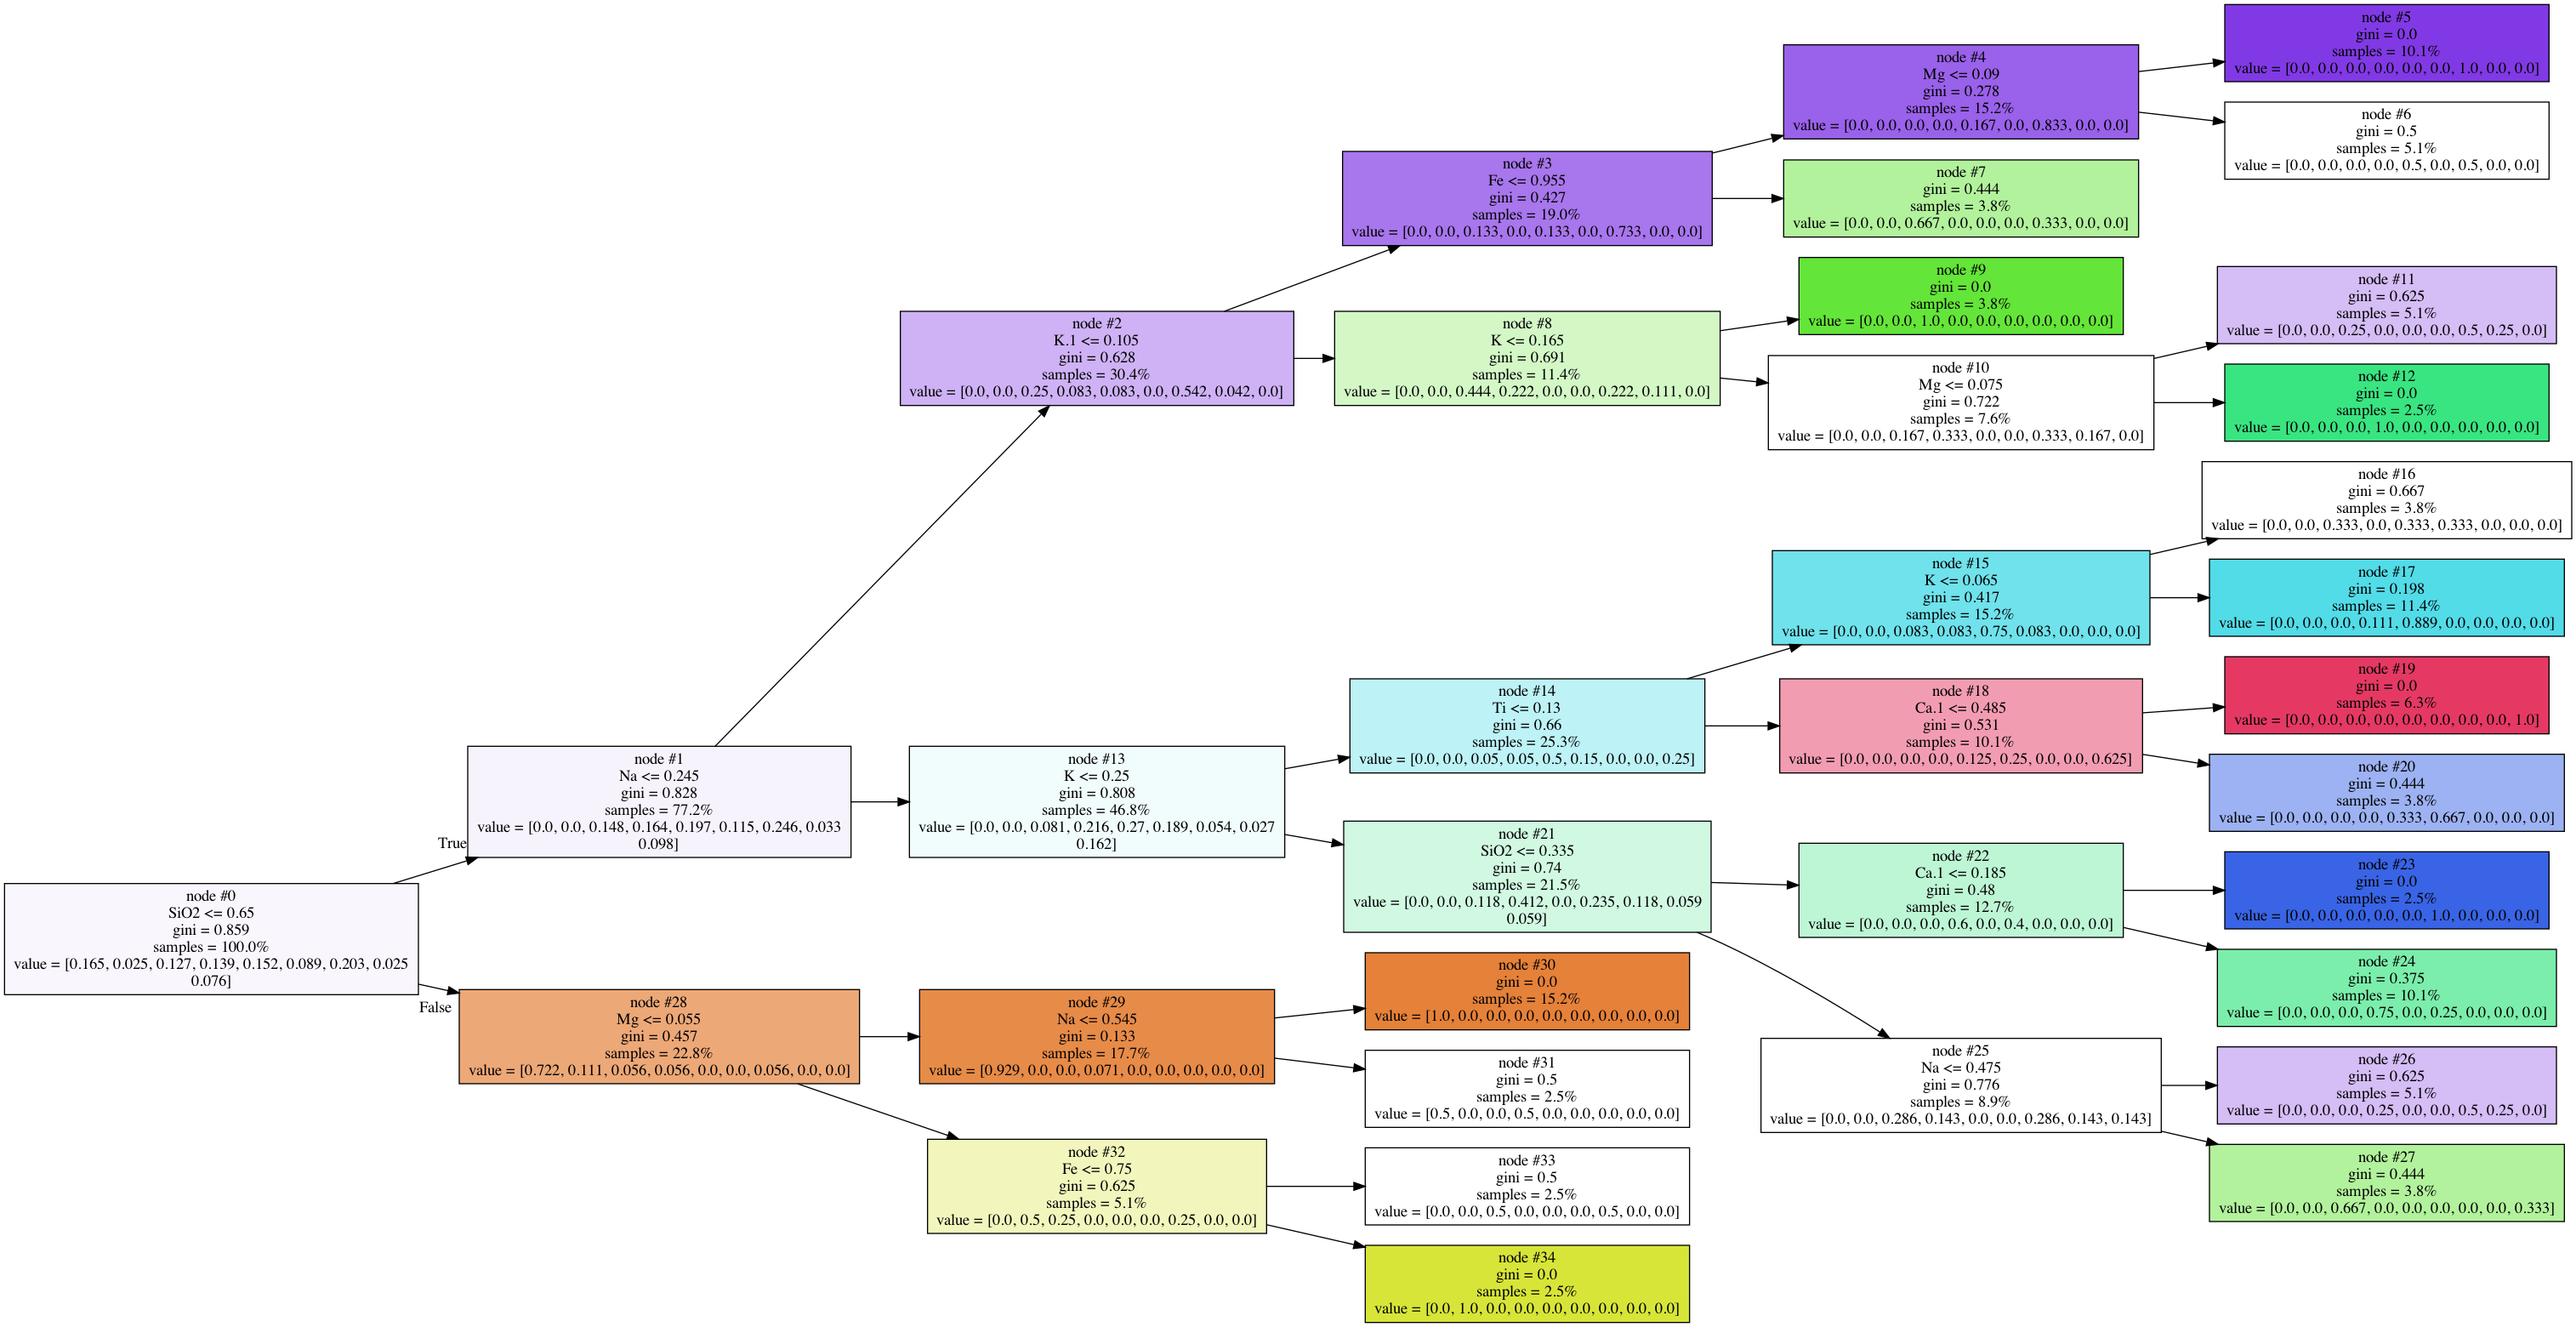

In [105]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(model,
                out_file='tree.dot',
                # задать названия фич
                feature_names=X.columns,
                class_names=None,
                # показывать названия полей у численных значений внутри узла
                label='all',
                # раскрашивать узлы в цвет преобладающего класса
                filled=True,
                # показывать значение impurity для каждого узла
                impurity=True,
                # показывать номера узлов
                node_ids=True,
                # Показывать доли каждого класса в узлах (а не количество)
                proportion=True,
                # Повернуть дерево на 90 градусов (вертикальная ориентация)
                rotate=True,
                # Число точек после запятой для отображаемых дробей
                # precision=3
               )
# Преобразуем файл tree.dot в tree.png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png']);
# Вставляем картинку в блокнот
Image("tree.png")

In [100]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
2,SiO2,0.238019
3,Na,0.166547
0,K,0.150167
6,Mg,0.146357
5,Ca.1,0.098172
7,Ti,0.082215
8,Fe,0.067298
4,K.1,0.051225
1,Ca,0.000000


In [101]:
pred = model.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 6, 3, 4, 6, 3, 3, 3, 3, 3, 3, 3, 0, 4, 5, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 3, 2, 5, 5, 5, 3, 5, 6, 2, 6, 6, 6, 6, 2, 6, 6, 6, 6,
       6, 4, 6, 6, 4, 6, 6, 8, 2, 8, 8, 8, 8])

In [102]:
Y.array

<PandasArray>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8,
 8]
Length: 79, dtype: int64

In [125]:
ydf = pd.DataFrame([Y.array, pred], ['real', 'pred']).transpose()

In [134]:
ydf['T/F'] = (ydf['real'] == ydf['pred'])
ydf.head(60)

,real,pred,T/F
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,0,0,True
6,0,0,True
7,0,0,True
8,0,0,True
9,0,0,True


In [103]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(Y, pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1,2,3,4,5,6,7,8
0,13,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0
2,0,0,9,0,0,0,1,0,0
3,1,0,0,8,1,0,1,0,0
4,0,0,1,0,10,1,0,0,0
5,0,0,1,2,0,4,0,0,0
6,0,0,2,0,2,0,12,0,0
7,0,0,0,0,0,0,2,0,0
8,0,0,1,0,0,0,0,0,5


In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, pred)

0.7974683544303798